In [1]:
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import tensorflow as tf

In [22]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 5.1 MB/s 
     |████████████████████████████████| 7.6 MB 42.5 MB/s 
     |████████████████████████████████| 182 kB 60.2 MB/s 


In [2]:
#load the tensorflow dataset
dataset = tfds.load('amazon_us_reviews/Mobile_Electronics_v1_00',split='train',shuffle_files=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/104975 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0.incompleteCFIGL4/amazon_us_re…

Dataset amazon_us_reviews downloaded and prepared to ~/tensorflow_datasets/amazon_us_reviews/Mobile_Electronics_v1_00/0.1.0. Subsequent calls will reuse this data.


In [3]:
#convert the dataset to pandas dataframe

dataset =tfds.as_dataframe(dataset)
dataset.head()

,data/customer_id,data/helpful_votes,data/marketplace,data/product_category,data/product_id,data/product_parent,data/product_title,data/review_body,data/review_date,data/review_headline,data/review_id,data/star_rating,data/total_votes,data/verified_purchase,data/vine
0,b'20980074',0,b'US',b'Mobile_Electronics',b'B00D1847NE',b'274617424',b'Teenage Mutant Ninja Turtles Boombox CD Play...,b'Does not work',b'2015-01-09',b'One Star',b'R1OVS0D6SEXPW7',1,0,0,1
1,b'779273',0,b'US',b'Mobile_Electronics',b'B00KMO6DYG',b'397452138',b'4 Gauge Amp Kit Amplifier Install Wiring Com...,b'This is a great wiring kit i used it to set ...,b'2015-08-06',b'Great kit',b'R9VSD0ET8FERB',4,0,0,1
2,b'15410531',0,b'US',b'Mobile_Electronics',b'B000GWLL0K',b'948304826',b'Travel Wall Charger fits Creative Zen Vision...,b'It works great so much faster than USB charg...,b'2007-03-15',b'A/C Charger for Creative Zen Vision M',b'R3ISXCZHWLJLBH',5,0,0,1
3,b'27389005',0,b'US',b'Mobile_Electronics',b'B008L3JE6Y',b'466340015',b'High Grade Robust 360\xc2\xb0 Adjustable Car...,b'This product was purchased to hold a monitor...,b'2013-07-30',b'camera stand',b'R1TWVUDOFJSQAW',5,0,0,1
4,b'2663569',0,b'US',b'Mobile_Electronics',b'B00GHZS4SC',b'350592810',b'HDE Multifunctional Bluetooth FM Audio Car K...,"b""it works but it has really bad sound quality...",b'2014-12-31',b'bad sound quality',b'R2PEOEUR1LP0GH',3,0,0,1


In [4]:
#Pick the relevant columns of interest

columns_of_interest = ['data/review_body','data/star_rating']
data = dataset[columns_of_interest]
data.head()

,data/review_body,data/star_rating
0,b'Does not work',1
1,b'This is a great wiring kit i used it to set ...,4
2,b'It works great so much faster than USB charg...,5
3,b'This product was purchased to hold a monitor...,5
4,"b""it works but it has really bad sound quality...",3


In [5]:
#Get the number of samples 
print("Total number of datapoints:", data.shape[0])

Total number of datapoints: 104975


In [6]:
#Get the number of class (we will convert this the rating to sentiment in the next stage)
print("Number of classes:",data['data/star_rating'].nunique())

Number of classes: 5


In [7]:
#Get the number of samples per class
print("Number of samples per class: \n",data['data/star_rating'].value_counts())

Number of samples per class: 
 5    52255
4    18088
1    17587
3     9734
2     7311
Name: data/star_rating, dtype: int64


In [8]:
#Get the number of words per sample
print("Number of words per sample:",np.mean(data['data/review_body'].apply(lambda x:len(x.split()))))

Number of words per sample: 63.97938556799238


In [9]:
#Get the distribution of number of words per sample
print("Distribution of number of words per sample:")
pd.DataFrame([len(s) for s in data['data/review_body']]).value_counts()

Distribution of number of words per sample:


9        550
114      534
115      523
113      522
119      518
        ... 
2724       1
2729       1
2731       1
2732       1
16009      1
Length: 3079, dtype: int64

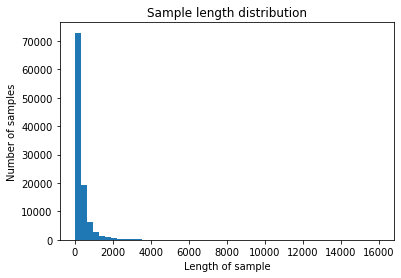

In [10]:
#Plot the distribution of sample length
def plot_sample_length_distribution(sample_texts):
  plt.hist([len(s)for s in sample_texts], 50)
  plt.xlabel("Length of sample")
  plt.ylabel("Number of samples")
  plt.title("Sample length distribution")
  plt.show()

plot_sample_length_distribution(data['data/review_body'].tolist())


In [11]:
#Take a sample of 50% of the dataset for the purpose of demonstration
data = data.sample(frac=0.3, random_state=42)  #30%
data.head()

,data/review_body,data/star_rating
87666,"b""The motor spins and is not stationary. That ...",3
47509,b'Fake',1
69877,"b""Even though there are finally some silicone ...",5
11951,"b""Absolutely Wonderful: This product is every...",5
73562,"b""Love this Bluetooth speaker...easy setup, wo...",5


In [12]:
print("Number of datapoints after sampling:",data.shape)

Number of datapoints after sampling: (31492, 2)


In [13]:
#Convert the star rating to sentiment
data['sentiment'] = data['data/star_rating'].apply(lambda rating: "positive" if rating>=3 else "negative")
data.head()

,data/review_body,data/star_rating,sentiment
87666,"b""The motor spins and is not stationary. That ...",3,positive
47509,b'Fake',1,negative
69877,"b""Even though there are finally some silicone ...",5,positive
11951,"b""Absolutely Wonderful: This product is every...",5,positive
73562,"b""Love this Bluetooth speaker...easy setup, wo...",5,positive


In [14]:
#One-hot encode the target label
data['sentiment'] = data['sentiment'].map({'positive':1,'negative':0})

#Drop the rating column
data.drop(columns=['data/star_rating'],inplace=True)
data.head()

,data/review_body,sentiment
87666,"b""The motor spins and is not stationary. That ...",1
47509,b'Fake',0
69877,"b""Even though there are finally some silicone ...",1
11951,"b""Absolutely Wonderful: This product is every...",1
73562,"b""Love this Bluetooth speaker...easy setup, wo...",1


In [15]:
#Preprocess the reviews
data.rename(columns={'data/review_body':'review'},inplace=True)
data['review']= data['review'].str.decode('utf-8')
data['review']= data['review'].apply(str.lower)
data['review']
data.head()

,review,sentiment
87666,the motor spins and is not stationary. that se...,1
47509,fake,0
69877,even though there are finally some silicone ca...,1
11951,absolutely wonderful: this product is everyth...,1
73562,"love this bluetooth speaker...easy setup, wond...",1


In [16]:
#Check the samples per class
data['sentiment'].value_counts()

1    24067
0     7425
Name: sentiment, dtype: int64

In [17]:
#Balance out the classes for the purpose of demonstration
positive = data[data['sentiment']==1].sample(n=7425,random_state=42)
negative = data[data['sentiment']==0]
train_data = pd.concat([positive,negative]).sample(frac=1).reset_index(drop=True)
train_data['sentiment'].value_counts()


0    7425
1    7425
Name: sentiment, dtype: int64

In [18]:
#Sample reiews and its corresponding labels
reviews = train_data['review'].tolist()
labels = train_data['sentiment'].tolist()

print("Sample reviews:")
print(reviews[10:16])
print("Corresponding labels:")
print(labels[10:16])


Sample reviews:
['received when promised. few instructions made it extremely hard to load. once loaded the product kept shutting itself off. returnd the product after three days.', 'i have had this sub for a few years now and it is truly amazing.  the sound output is incredible.  the only drawback is the very large box required for it.  all in all if you are looking for a huge hitting loud sub this one is it.', 'i thought it automatically erase old files when memory is full but it is not.<br />when disk is full it stop recording.<br />i stopped use it now.<br />i can not manually erase files everyday.<br /><br />what a waste of money..', "as the other reviewer stated, the picture quality is not even close to what other g1w cameras produce.  at 1080 or 720, license plates can't even be made out from the video.  the menus are not the same so i am assuming that the chip inside is not the one advertised to have.  the one i received seems to have a film on the lens which might be causing th

In [19]:
#Split the data into train, test and validation split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(reviews, labels, test_size=.2, random_state=42)

In [20]:
#Number of train and test data
print("Number of train data points:",len(X_train))
print("Number of train labels:",len(y_train))
print("Number of test data points:",len(X_test))
print("Number of test labels:",len(y_test))

Number of train data points: 11880
Number of train labels: 11880
Number of test data points: 2970
Number of test labels: 2970


In [23]:
#Load the tokenizer
from transformers import DistilBertTokenizerFast
MODEL_NAME = 'distilbert-base-uncased-finetuned-sst-2-english'
tokenizer = DistilBertTokenizerFast.from_pretrained(MODEL_NAME)

Downloading:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/629 [00:00<?, ?B/s]

In [24]:
#Sample tokenization
print("Sentence:", X_train[0])
tokenizer(X_train[0], truncation= True, padding= True, max_length=256,return_tensors='tf')

Sentence: i ordered the 8-pin adapter for my ipod and instead received the 30-pin adapter despite the description indicating that it would be the 8-pin.


{'input_ids': <tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[  101,  1045,  3641,  1996,  1022,  1011,  9231, 15581,  2121,
         2005,  2026, 26322,  1998,  2612,  2363,  1996,  2382,  1011,
         9231, 15581,  2121,  2750,  1996,  6412,  8131,  2008,  2009,
         2052,  2022,  1996,  1022,  1011,  9231,  1012,   102]],
      dtype=int32)>, 'attention_mask': <tf.Tensor: shape=(1, 35), dtype=int32, numpy=
array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]], dtype=int32)>}

In [25]:
#Perform tokenization
MAX_LENGTH=256

train_encodings = tokenizer(X_train, truncation= True, padding= True,return_tensors="tf", max_length= MAX_LENGTH)
test_encodings = tokenizer(X_test, truncation= True, padding= True,return_tensors="tf",max_length= MAX_LENGTH)

In [26]:
#Convert the tokenizer to TF object
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings),y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings),y_test))

In [27]:
#Define the model - use pretrained distilbert_model and specify the label
from transformers import TFDistilBertForSequenceClassification
model = TFDistilBertForSequenceClassification.from_pretrained(pretrained_model_name_or_path= MODEL_NAME,num_labels=2)

Downloading:   0%|          | 0.00/268M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFDistilBertForSequenceClassification.

All the layers of TFDistilBertForSequenceClassification were initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFDistilBertForSequenceClassification for predictions without further training.


In [28]:
#Specify the model optimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-5,)

In [29]:
#Specify the loss function
loss_func = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [30]:
#Compile the model
model.compile(optimizer=optimizer,loss=loss_func,metrics=['accuracy'])

In [31]:
#Inspect the model 
model.summary()

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 distilbert (TFDistilBertMai  multiple                 66362880  
 nLayer)                                                         
                                                                 
 pre_classifier (Dense)      multiple                  590592    
                                                                 
 classifier (Dense)          multiple                  1538      
                                                                 
 dropout_19 (Dropout)        multiple                  0         
                                                                 
Total params: 66,955,010
Trainable params: 66,955,010
Non-trainable params: 0
_________________________________________________________________


In [32]:
#Define hyperparameters

BATCH_SIZE = 16
NUM_EPOCHS = 2

#Train the model
model.fit(train_dataset.shuffle(len(X_train)).batch(BATCH_SIZE),epochs=NUM_EPOCHS,batch_size =BATCH_SIZE, validation_data=test_dataset.shuffle(len(X_test)).batch(BATCH_SIZE))

Epoch 1/2
  5/743 [..............................] - ETA: 7:15:26 - loss: 0.7455 - accuracy: 0.8000

KeyboardInterrupt: ignored

In [33]:
#save the model
model.save_pretrained("/tmp/sentiment_model")

In [34]:
#Preprocess the unseen data
unseen_data = data.sample(frac=0.05, random_state=42)
unseen_reviews = unseen_data['review'].tolist()

unseen_encodings = tokenizer(unseen_reviews,truncation= True, padding= True,return_tensors="tf", max_length= MAX_LENGTH)
y_unseen = unseen_data['sentiment'].tolist()

unseen_encodings =  tf.data.Dataset.from_tensor_slices((dict(unseen_encodings),y_unseen))


In [35]:
#Evaluate the model
model.evaluate(unseen_encodings.shuffle(len(unseen_reviews)).batch(BATCH_SIZE),return_dict=True,batch_size=BATCH_SIZE)

KeyboardInterrupt: ignored

In [38]:
import gradio as gr

def predict(sentence):
  #Load model
  loaded_model = TFDistilBertForSequenceClassification.from_pretrained("/tmp/sentiment_model")

  #Get the prediction 
  predict_input = tokenizer.encode(sentence, truncation = True, padding = True, return_tensors = 'tf')
  tf_output = loaded_model.predict(predict_input)[0]
  tf_prediction = tf.nn.softmax(tf_output, axis=1).numpy()[0]
  return['negative','positive'][np.argmax(tf_prediction)]

demo = gr.Interface(fn=predict, inputs="text",outputs="text",live = True)
demo.launch()

Colab notebook detected. To show errors in colab notebook, set `debug=True` in `launch()`
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

In [37]:
pip install gradio


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.6 MB 5.3 MB/s 
     |████████████████████████████████| 54 kB 2.9 MB/s 
     |████████████████████████████████| 56 kB 5.1 MB/s 
     |████████████████████████████████| 55 kB 4.0 MB/s 
     |████████████████████████████████| 84 kB 3.9 MB/s 
     |████████████████████████████████| 106 kB 74.6 MB/s 
     |████████████████████████████████| 213 kB 46.5 MB/s 
     |████████████████████████████████| 84 kB 3.3 MB/s 
     |████████████████████████████████| 2.3 MB 37.1 MB/s 
     |████████████████████████████████| 278 kB 81.0 MB/s 
     |████████████████████████████████| 64 kB 3.0 MB/s 
     |████████████████████████████████| 80 kB 9.7 MB/s 
     |████████████████████████████████| 68 kB 7.5 MB/s 
     |████████████████████████████████| 68 kB 8.2 MB/s 
     |████████████████████████████████| 68 kB 7.6 MB/s 
     |████████████████████████████████| 68 kB 7.4 M